In [1]:
# Rakki maths 1st test
import random

def sample_div(n=3, m=2):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m) - 1
    b = max(2, b)
    return (a, b, a//b, a % b)

def sample_mult(n=3, m=1):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    return (a, b, a*b)

def sample_rect(n=3, m=3):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    c = random.randint(10**(m-2), 10**(m-1))
    return 'Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist ' + str(a) + ', die Breite ist ' + str(b) + ', die Einfahrt ' + str(c) + ' Meter. Wie viel Zaun brauche ich?'

def write_number(n=4):
    a = random.randint(10**(n-1), 10**n)
    lttrs = ['T', 'H', 'Z', 'E']
    res = [c + lttrs[i + (len(lttrs)-n)] for i,c in enumerate(str(a))]
    random.shuffle(res)
    return res

def conv_nr(n=2):
    a = random.randint(10**(n-1), 10**n)
    return 'Wie viele mm sind ' + str(a) + 'm?'

for i in range(3):
    problem = sample_div()
    print(f"{problem[0]} : {problem[1]} = {problem[2]}, R {problem[3]}")
for i in range(3):
    problem = sample_mult()
    print(f"{problem[0]} * {problem[1]} = {problem[2]}")
for i in range(3): 
    print(f"{sample_rect()}")
for i in range(3):
    print(f"{write_number()}")
for i in range(3):
    print(f"{conv_nr()}")

261 : 74 = 3, R 39
623 : 93 = 6, R 65
456 : 91 = 5, R 1
146 * 2 = 292
423 * 3 = 1269
660 * 6 = 3960
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 444, die Breite ist 723, die Einfahrt 90 Meter. Wie viel Zaun brauche ich?
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 420, die Breite ist 334, die Einfahrt 58 Meter. Wie viel Zaun brauche ich?
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 411, die Breite ist 666, die Einfahrt 86 Meter. Wie viel Zaun brauche ich?
['0H', '3Z', '4T', '2E']
['4T', '3Z', '3H', '2E']
['7E', '4T', '9H', '0Z']
Wie viele mm sind 49m?
Wie viele mm sind 99m?
Wie viele mm sind 41m?


In [2]:
# erosion model via NN

import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
%matplotlib notebook

def spsty(k, x, nbrs):
    '''sparsity at x for k neighbors'''
    dist, ind = nbrs.kneighbors(x)
    return np.sum(dist) / k

modeldim = 144
nshown = 80
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = nshown+1, modeldim, 3, modeldim # 2

word = u'xxxx'  # <--- change this to display a different neighbourhood
word_labels = [word]

close_words = model.wv.most_similar(word, topn=nshown)
arr = np.empty((0, D_in), dtype='f')
arr = np.append(arr, np.array([model.wv[word]]), axis=0)
for wrd_score in close_words:
    wrd_vector = model.wv[wrd_score[0]]
    if not wrd_score[0] in word_labels: # fix double-words
        word_labels.append(wrd_score[0])
    arr = np.append(arr, np.array([wrd_vector]), axis=0)
    
y = range(D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.05
w2 = np.random.randn(H, D_out)*0.05

b1 = np.zeros(H)  # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

learning_rate = 1e-1
for t in range(60):
    # Forward pass: compute predicted y
    h = np.dot(arr, w1) + b1
    h_relu = np.maximum(h, 0)
    #h_relu = softmax(h)
    y_pred = np.dot(h_relu, w2) + b2 # output

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = (y_pred - y)
    grad_w2 = np.dot(h_relu.T, grad_y_pred) * np.ones_like(w2)  # dw2 = (.) ReLu(h)
    grad_b2 = grad_y_pred
    grad_h_relu = np.dot(grad_y_pred, w2.T)  # dw1 = (.) w2 ReLu'(h) x
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0  # ReLU'
    grad_w1 = np.dot(grad_h.T, arr)
    grad_b1 = np.dot(w2, grad_y_pred.T)

    # Update weights
    for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1.T, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8)  # adagrad update
    
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
xc = []
yc = []
xysz = []
for i in range(nshown):
    xycoord = np.dot(arr[i], w1)
    scalezcoord = np.average(xycoord) / 50
    xc.append(xycoord[0] + random.uniform(-xycoord[2], xycoord[2]) / scalezcoord)  # use 3rd hidden variable to change pos a bit
    yc.append(xycoord[1] + random.uniform(-xycoord[2], xycoord[2]) / scalezcoord)
    xysz.append(model.wv.get_vecattr(close_words[i][0], "count") / 10)
    
for label, x, y in zip(word_labels, xc, yc):
    if label == word:  # make the reference term stand out
        plt.annotate(label, xy=(x, y), xytext=(1, 1), textcoords='offset points', fontsize=12, color='red')
    else:
        plt.annotate(label, xy=(x, y), xytext=(1, 1), textcoords='offset points', fontsize=10)

plt.scatter(xc, yc, s=xysz)
ax = plt.gca()
ax.set_facecolor('white')

plt.show()
#plt.savefig('w2vec cloud 0.png', bbox_inches='tight')

NameError: name 'model' is not defined

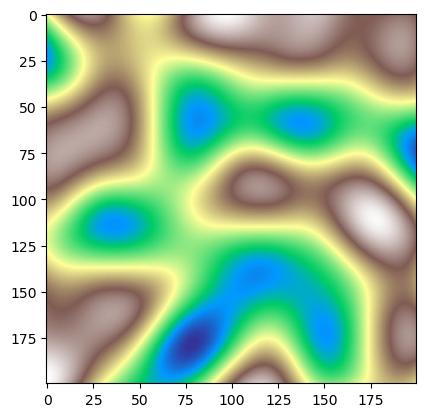

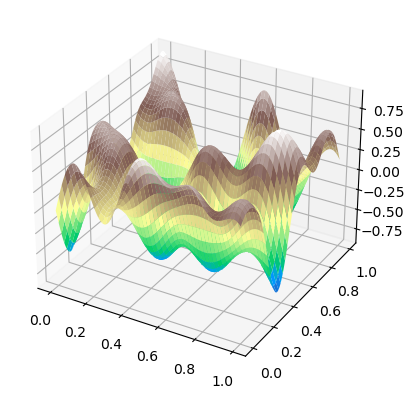

In [3]:
%matplotlib inline
#import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d

"""Perlin noise -- pure python implementation"""

__version__ = '$Id: perlin.py 521 2008-12-15 03:03:52Z casey.duncan $'

from math import floor, fmod, sqrt
from random import randint

# 3D Gradient vectors
_GRAD3 = ((1,1,0),(-1,1,0),(1,-1,0),(-1,-1,0), 
	(1,0,1),(-1,0,1),(1,0,-1),(-1,0,-1), 
	(0,1,1),(0,-1,1),(0,1,-1),(0,-1,-1),
	(1,1,0),(0,-1,1),(-1,1,0),(0,-1,-1),
) 

# 4D Gradient vectors
_GRAD4 = ((0,1,1,1), (0,1,1,-1), (0,1,-1,1), (0,1,-1,-1), 
	(0,-1,1,1), (0,-1,1,-1), (0,-1,-1,1), (0,-1,-1,-1), 
	(1,0,1,1), (1,0,1,-1), (1,0,-1,1), (1,0,-1,-1), 
	(-1,0,1,1), (-1,0,1,-1), (-1,0,-1,1), (-1,0,-1,-1), 
	(1,1,0,1), (1,1,0,-1), (1,-1,0,1), (1,-1,0,-1), 
	(-1,1,0,1), (-1,1,0,-1), (-1,-1,0,1), (-1,-1,0,-1), 
	(1,1,1,0), (1,1,-1,0), (1,-1,1,0), (1,-1,-1,0), 
	(-1,1,1,0), (-1,1,-1,0), (-1,-1,1,0), (-1,-1,-1,0))

# A lookup table to traverse the simplex around a given point in 4D. 
# Details can be found where this table is used, in the 4D noise method. 
_SIMPLEX = (
	(0,1,2,3),(0,1,3,2),(0,0,0,0),(0,2,3,1),(0,0,0,0),(0,0,0,0),(0,0,0,0),(1,2,3,0), 
	(0,2,1,3),(0,0,0,0),(0,3,1,2),(0,3,2,1),(0,0,0,0),(0,0,0,0),(0,0,0,0),(1,3,2,0), 
	(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0), 
	(1,2,0,3),(0,0,0,0),(1,3,0,2),(0,0,0,0),(0,0,0,0),(0,0,0,0),(2,3,0,1),(2,3,1,0), 
	(1,0,2,3),(1,0,3,2),(0,0,0,0),(0,0,0,0),(0,0,0,0),(2,0,3,1),(0,0,0,0),(2,1,3,0), 
	(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0), 
	(2,0,1,3),(0,0,0,0),(0,0,0,0),(0,0,0,0),(3,0,1,2),(3,0,2,1),(0,0,0,0),(3,1,2,0), 
	(2,1,0,3),(0,0,0,0),(0,0,0,0),(0,0,0,0),(3,1,0,2),(0,0,0,0),(3,2,0,1),(3,2,1,0))

# Simplex skew constants
_F2 = 0.5 * (sqrt(3.0) - 1.0)
_G2 = (3.0 - sqrt(3.0)) / 6.0
_F3 = 1.0 / 3.0
_G3 = 1.0 / 6.0


class BaseNoise:
	"""Noise abstract base class"""

	permutation = (151,160,137,91,90,15, 
		131,13,201,95,96,53,194,233,7,225,140,36,103,30,69,142,8,99,37,240,21,10,23, 
		190,6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33, 
		88,237,149,56,87,174,20,125,136,171,168,68,175,74,165,71,134,139,48,27,166, 
		77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244, 
		102,143,54,65,25,63,161,1,216,80,73,209,76,132,187,208,89,18,169,200,196, 
		135,130,116,188,159,86,164,100,109,198,173,186,3,64,52,217,226,250,124,123, 
		5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42, 
		223,183,170,213,119,248,152,2,44,154,163,70,221,153,101,155,167,43,172,9, 
		129,22,39,253,9,98,108,110,79,113,224,232,178,185,112,104,218,246,97,228, 
		251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107, 
		49,192,214,31,181,199,106,157,184,84,204,176,115,121,50,45,127,4,150,254, 
		138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180)
	
	period = len(permutation)

	# Double permutation array so we don't need to wrap
	permutation = permutation * 2

	def __init__(self, period=None, permutation_table=None):
		"""Initialize the noise generator. With no arguments, the default
		period and permutation table are used (256). The default permutation
		table generates the exact same noise pattern each time.
		
		An integer period can be specified, to generate a random permutation
		table with period elements. The period determines the (integer)
		interval that the noise repeats, which is useful for creating tiled
		textures.  period should be a power-of-two, though this is not
		enforced. Note that the speed of the noise algorithm is indpendent of
		the period size, though larger periods mean a larger table, which
		consume more memory.

		A permutation table consisting of an iterable sequence of whole
		numbers can be specified directly. This should have a power-of-two
		length. Typical permutation tables are a sequnce of unique integers in
		the range [0,period) in random order, though other arrangements could
		prove useful, they will not be "pure" simplex noise. The largest
		element in the sequence must be no larger than period-1.

		period and permutation_table may not be specified together.
		"""
		if period is not None and permutation_table is not None:
			raise ValueError(
				'Can specify either period or permutation_table, not both')
		if period is not None:
			self.randomize(period)
		elif permutation_table is not None:
			self.permutation = tuple(permutation_table) * 2
			self.period = len(permutation_table)

	def randomize(self, period=None):
		"""Randomize the permutation table used by the noise functions. This
		makes them generate a different noise pattern for the same inputs.
		"""
		if period is not None:
			self.period = period
		perm = list(range(self.period))
		perm_right = self.period - 1
		for i in list(perm):
			j = randint(0, perm_right)
			perm[i], perm[j] = perm[j], perm[i]
		self.permutation = tuple(perm) * 2


class SimplexNoise(BaseNoise):
	"""Perlin simplex noise generator

	Adapted from Stefan Gustavson's Java implementation described here:

	http://staffwww.itn.liu.se/~stegu/simplexnoise/simplexnoise.pdf

	To summarize:

	"In 2001, Ken Perlin presented 'simplex noise', a replacement for his classic
	noise algorithm.  Classic 'Perlin noise' won him an academy award and has
	become an ubiquitous procedural primitive for computer graphics over the
	years, but in hindsight it has quite a few limitations.  Ken Perlin himself
	designed simplex noise specifically to overcome those limitations, and he
	spent a lot of good thinking on it. Therefore, it is a better idea than his
	original algorithm. A few of the more prominent advantages are: 

	* Simplex noise has a lower computational complexity and requires fewer
	  multiplications. 
	* Simplex noise scales to higher dimensions (4D, 5D and up) with much less
	  computational cost, the complexity is O(N) for N dimensions instead of 
	  the O(2^N) of classic Noise. 
	* Simplex noise has no noticeable directional artifacts.  Simplex noise has 
	  a well-defined and continuous gradient everywhere that can be computed 
	  quite cheaply. 
	* Simplex noise is easy to implement in hardware."
	"""

	def noise2(self, x, y):
		"""2D Perlin simplex noise. 
		
		Return a floating point value from -1 to 1 for the given x, y coordinate. 
		The same value is always returned for a given x, y pair unless the
		permutation table changes (see randomize above). 
		"""
		# Skew input space to determine which simplex (triangle) we are in
		s = (x + y) * _F2
		i = floor(x + s)
		j = floor(y + s)
		t = (i + j) * _G2
		x0 = x - (i - t) # "Unskewed" distances from cell origin
		y0 = y - (j - t)

		if x0 > y0:
			i1 = 1; j1 = 0 # Lower triangle, XY order: (0,0)->(1,0)->(1,1)
		else:
			i1 = 0; j1 = 1 # Upper triangle, YX order: (0,0)->(0,1)->(1,1)
		
		x1 = x0 - i1 + _G2 # Offsets for middle corner in (x,y) unskewed coords
		y1 = y0 - j1 + _G2
		x2 = x0 + _G2 * 2.0 - 1.0 # Offsets for last corner in (x,y) unskewed coords
		y2 = y0 + _G2 * 2.0 - 1.0

		# Determine hashed gradient indices of the three simplex corners
		perm = self.permutation
		ii = int(i) % self.period
		jj = int(j) % self.period
		gi0 = perm[ii + perm[jj]] % 12
		gi1 = perm[ii + i1 + perm[jj + j1]] % 12
		gi2 = perm[ii + 1 + perm[jj + 1]] % 12

		# Calculate the contribution from the three corners
		tt = 0.5 - x0**2 - y0**2
		if tt > 0:
			g = _GRAD3[gi0]
			noise = tt**4 * (g[0] * x0 + g[1] * y0)
		else:
			noise = 0.0
		
		tt = 0.5 - x1**2 - y1**2
		if tt > 0:
			g = _GRAD3[gi1]
			noise += tt**4 * (g[0] * x1 + g[1] * y1)
		
		tt = 0.5 - x2**2 - y2**2
		if tt > 0:
			g = _GRAD3[gi2]
			noise += tt**4 * (g[0] * x2 + g[1] * y2)

		return noise * 70.0 # scale noise to [-1, 1]

	def noise3(self, x, y, z):
		"""3D Perlin simplex noise. 
		
		Return a floating point value from -1 to 1 for the given x, y, z coordinate. 
		The same value is always returned for a given x, y, z pair unless the
		permutation table changes (see randomize above).
		"""
		# Skew the input space to determine which simplex cell we're in
		s = (x + y + z) * _F3
		i = floor(x + s)
		j = floor(y + s)
		k = floor(z + s)
		t = (i + j + k) * _G3
		x0 = x - (i - t) # "Unskewed" distances from cell origin
		y0 = y - (j - t)
		z0 = z - (k - t)

		# For the 3D case, the simplex shape is a slightly irregular tetrahedron. 
		# Determine which simplex we are in. 
		if x0 >= y0:
			if y0 >= z0:
				i1 = 1; j1 = 0; k1 = 0
				i2 = 1; j2 = 1; k2 = 0
			elif x0 >= z0:
				i1 = 1; j1 = 0; k1 = 0
				i2 = 1; j2 = 0; k2 = 1
			else:
				i1 = 0; j1 = 0; k1 = 1
				i2 = 1; j2 = 0; k2 = 1
		else: # x0 < y0
			if y0 < z0:
				i1 = 0; j1 = 0; k1 = 1
				i2 = 0; j2 = 1; k2 = 1
			elif x0 < z0:
				i1 = 0; j1 = 1; k1 = 0
				i2 = 0; j2 = 1; k2 = 1
			else:
				i1 = 0; j1 = 1; k1 = 0
				i2 = 1; j2 = 1; k2 = 0
		
		# Offsets for remaining corners
		x1 = x0 - i1 + _G3
		y1 = y0 - j1 + _G3
		z1 = z0 - k1 + _G3
		x2 = x0 - i2 + 2.0 * _G3
		y2 = y0 - j2 + 2.0 * _G3
		z2 = z0 - k2 + 2.0 * _G3
		x3 = x0 - 1.0 + 3.0 * _G3
		y3 = y0 - 1.0 + 3.0 * _G3
		z3 = z0 - 1.0 + 3.0 * _G3

		# Calculate the hashed gradient indices of the four simplex corners
		perm = self.permutation
		ii = int(i) % self.period
		jj = int(j) % self.period
		kk = int(k) % self.period
		gi0 = perm[ii + perm[jj + perm[kk]]] % 12
		gi1 = perm[ii + i1 + perm[jj + j1 + perm[kk + k1]]] % 12
		gi2 = perm[ii + i2 + perm[jj + j2 + perm[kk + k2]]] % 12
		gi3 = perm[ii + 1 + perm[jj + 1 + perm[kk + 1]]] % 12

		# Calculate the contribution from the four corners
		noise = 0.0
		tt = 0.6 - x0**2 - y0**2 - z0**2
		if tt > 0:
			g = _GRAD3[gi0]
			noise = tt**4 * (g[0] * x0 + g[1] * y0 + g[2] * z0)
		else:
			noise = 0.0
		
		tt = 0.6 - x1**2 - y1**2 - z1**2
		if tt > 0:
			g = _GRAD3[gi1]
			noise += tt**4 * (g[0] * x1 + g[1] * y1 + g[2] * z1)
		
		tt = 0.6 - x2**2 - y2**2 - z2**2
		if tt > 0:
			g = _GRAD3[gi2]
			noise += tt**4 * (g[0] * x2 + g[1] * y2 + g[2] * z2)
		
		tt = 0.6 - x3**2 - y3**2 - z3**2
		if tt > 0:
			g = _GRAD3[gi3]
			noise += tt**4 * (g[0] * x3 + g[1] * y3 + g[2] * z3)
		
		return noise * 32.0


def lerp(t, a, b):
	return a + t * (b - a)

def grad3(hash, x, y, z):
	g = _GRAD3[hash % 16]
	return x*g[0] + y*g[1] + z*g[2]


class TileableNoise(BaseNoise):
	"""Tileable implemention of Perlin "improved" noise. This
	is based on the reference implementation published here:
	
	http://mrl.nyu.edu/~perlin/noise/
	"""

	def noise3(self, x, y, z, repeat, base=0.0):
		"""Tileable 3D noise.
		
		repeat specifies the integer interval in each dimension 
		when the noise pattern repeats.
		
		base allows a different texture to be generated for
		the same repeat interval.
		"""
		i = int(fmod(floor(x), repeat))
		j = int(fmod(floor(y), repeat))
		k = int(fmod(floor(z), repeat))
		ii = (i + 1) % repeat
		jj = (j + 1) % repeat
		kk = (k + 1) % repeat
		if base:
			i += base; j += base; k += base
			ii += base; jj += base; kk += base

		x -= floor(x); y -= floor(y); z -= floor(z)
		fx = x**3 * (x * (x * 6 - 15) + 10)
		fy = y**3 * (y * (y * 6 - 15) + 10)
		fz = z**3 * (z * (z * 6 - 15) + 10)

		perm = self.permutation
		A = perm[i]
		AA = perm[A + j]
		AB = perm[A + jj]
		B = perm[ii]
		BA = perm[B + j]
		BB = perm[B + jj]
		
		return lerp(fz, lerp(fy, lerp(fx, grad3(perm[AA + k], x, y, z),
										  grad3(perm[BA + k], x - 1, y, z)),
								 lerp(fx, grad3(perm[AB + k], x, y - 1, z),
										  grad3(perm[BB + k], x - 1, y - 1, z))),
						lerp(fy, lerp(fx, grad3(perm[AA + kk], x, y, z - 1),
										  grad3(perm[BA + kk], x - 1, y, z - 1)),
								 lerp(fx, grad3(perm[AB + kk], x, y - 1, z - 1),
										  grad3(perm[BB + kk], x - 1, y - 1, z - 1))))

shape = (200, 200)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

world = np.zeros(shape)
bn = SimplexNoise()
bn.randomize()

for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = bn.noise2(i/scale, 
                                    j/scale, 
                                    #octaves=octaves, 
                                    #persistence=persistence, 
                                    #lacunarity=lacunarity, 
                                    #repeatx=1024, 
                                    #repeaty=1024, 
                                    #base=42)
                               )
        
matplotlib.pyplot.imshow(world, cmap='terrain')

lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,world,cmap='terrain')

In [3]:
# Möbius function

def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors


def moebius(n):
    if n == 1:
        return 1
    factors = prime_factors(n)
    for i in range(1, len(factors)):
        if factors[i-1] == factors[i]:
            return 0
    if len(factors) % 2 == 0:
        return 1
    return -1

print([(n, moebius(n)) for n in range(1, 150)])

[(1, 1), (2, -1), (3, -1), (4, 0), (5, -1), (6, 1), (7, -1), (8, 0), (9, 0), (10, 1), (11, -1), (12, 0), (13, -1), (14, 1), (15, 1), (16, 0), (17, -1), (18, 0), (19, -1), (20, 0), (21, 1), (22, 1), (23, -1), (24, 0), (25, 0), (26, 1), (27, 0), (28, 0), (29, -1), (30, -1), (31, -1), (32, 0), (33, 1), (34, 1), (35, 1), (36, 0), (37, -1), (38, 1), (39, 1), (40, 0), (41, -1), (42, -1), (43, -1), (44, 0), (45, 0), (46, 1), (47, -1), (48, 0), (49, 0), (50, 0), (51, 1), (52, 0), (53, -1), (54, 0), (55, 1), (56, 0), (57, 1), (58, 1), (59, -1), (60, 0), (61, -1), (62, 1), (63, 0), (64, 0), (65, 1), (66, -1), (67, -1), (68, 0), (69, 1), (70, -1), (71, -1), (72, 0), (73, -1), (74, 1), (75, 0), (76, 0), (77, 1), (78, -1), (79, -1), (80, 0), (81, 0), (82, 1), (83, -1), (84, 0), (85, 1), (86, 1), (87, 1), (88, 0), (89, -1), (90, 0), (91, 1), (92, 0), (93, 1), (94, 1), (95, 1), (96, 0), (97, -1), (98, 0), (99, 0), (100, 0), (101, -1), (102, -1), (103, -1), (104, 0), (105, -1), (106, 1), (107, -1), (1

In [38]:
# inventory sequence

def inv_seq(n):
    res = []  # always take inventory at 0
    el = 0
    while el < n:
        idx = int(el*(el+1)/2)
        for i in range(el):
            res.append(res[:idx].count(i))
        res.append(0)
        el += 1
    return res

inv_seq(6)

[0, 1, 0, 2, 1, 0, 3, 2, 1, 0, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 0]

In [58]:
# https://www.janestreet.com/numberphile/
import math

def alljumps(n):
    return [(k, k-math.ceil(k/2), k+math.ceil(k/2)) for k in range(1, n+1)]

def njumps(n, s=1, path=[]):
    if s == n:
        return path
    if n > s/2:
        return njumps(n, s + math.ceil(s/2), path + [math.ceil(s/2)])  # go right
    else:
        return njumps(n, s - math.ceil(s/2), path + [-math.ceil(s/2)])  # go left

#[len(njumps(n)) for n in range(1,17)]  # [0, 1, 2, 5, 3, 6, 9, 4, 7, 10, 13, 5, 8, 19, 11, 14]
#[njumps(n) for n in range(1,17)]
#alljumps(17)

def njumps1(n, s=1, path=[]):
    if s == n:
        return path
    if n > 2*s and s > 1:
        return njumps(n, s + path[-1], path[:-1])  # backtrack
    if n > s/2:
        return njumps(n, s + math.ceil(s/2), path + [math.ceil(s/2)])  # go right
    else:
        return njumps(n, s - math.ceil(s/2), path + [-math.ceil(s/2)])  # go left

for n in range(1,18):
    print(njumps1(n))
#[njumps1(n) for n in range(1,17)]

[]
[1]
[1, 1]
[1, 1, 2, 3, -4]
[1, 1, 2]
[1, 1, 2, 3, 4, -6]
[1, 1, 2, 3, 4, 6, -9, 5, -7]
[1, 1, 2, 3]
[1, 1, 2, 3, 4, 6, -9]
[1, 1, 2, 3, 4, 6, 9, -14, 7, -10]
[1, 1, 2, 3, 4, 6, 9, -14, 7, 10, -15, 8, -12]
[1, 1, 2, 3, 4]
[1, 1, 2, 3, 4, 6, 9, -14]
[1, 1, 2, 3, 4, 6, 9, 14, -21, 10, -15, 8, 12, -18, 9, 13, -20, 10, -15]
[1, 1, 2, 3, 4, 6, 9, 14, -21, 10, -15]
[1, 1, 2, 3, 4, 6, 9, 14, -21, 10, 15, -23, 11, -17]


RecursionError: maximum recursion depth exceeded in comparison

In [43]:
l = [1,2,3,4,5]
l[:-1]

[1, 2, 3, 4]